In [1]:
# Import the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset and split it into training and testing sets
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

In [2]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
# Convert the class labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
#ImageDataGenerator Instance
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=15,  
        zoom_range=0.3,  
        width_shift_range=0.13, 
        height_shift_range=0.13)

In [6]:
datagen.fit(x_train)

In [7]:
# Define the architecture of the neural network using Keras Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop

net = Sequential()

#block1
net.add(Conv2D(32, (5, 5), activation=None, padding='same', input_shape=(28,28,1)))
net.add(BatchNormalization())
net.add(Activation('relu'))
net.add(Conv2D(32, (5, 5), activation=None, padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))
net.add(MaxPool2D(pool_size=(2,2)))
net.add(Dropout(0.25))

#block2
net.add(Conv2D(64, (3, 3), activation=None, padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))
net.add(Conv2D(64, (3, 3), activation=None, padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))
net.add(MaxPool2D((2,2), strides=(2,2)))
net.add(Dropout(0.25))

net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(0.5))
net.add(Dense(10, activation='softmax'))

net.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])

In [8]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0

In [9]:
import scipy
from tensorflow.keras.callbacks import EarlyStopping
# Use EarlyStopping to stop training if the validation loss does not improve for 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = net.fit(datagen.flow(x_train, y_train, batch_size=64),
                  validation_data=(x_test, y_test), epochs=100, callbacks=[early_stop])

Epoch 1/100
938/938 [==============================] - 15s 11ms/step - loss: 0.7461 - accuracy: 0.7569 - val_loss: 0.0700 - val_accuracy: 0.9795
Epoch 2/100
938/938 [==============================] - 10s 10ms/step - loss: 0.2755 - accuracy: 0.9193 - val_loss: 0.0978 - val_accuracy: 0.9705
Epoch 3/100
938/938 [==============================] - 10s 11ms/step - loss: 0.2059 - accuracy: 0.9413 - val_loss: 0.0318 - val_accuracy: 0.9902
Epoch 4/100
938/938 [==============================] - 10s 10ms/step - loss: 0.1695 - accuracy: 0.9500 - val_loss: 0.0315 - val_accuracy: 0.9903
Epoch 5/100
938/938 [==============================] - 10s 10ms/step - loss: 0.1531 - accuracy: 0.9555 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 6/100
938/938 [==============================] - 10s 11ms/step - loss: 0.1388 - accuracy: 0.9604 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 7/100
938/938 [==============================] - 10s 10ms/step - loss: 0.1265 - accuracy: 0.9646 - val_loss: 0.0278 - val_ac

In [13]:
import numpy as np
outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
# Calculate the accuracy of the model on the test set
misclassified=sum(labels_predicted!=labels_test)
print('Accuracy = ',100-(100*misclassified/labels_test.size))

313/313 [==============================] - 0s 1ms/step
Accuracy =  99.54


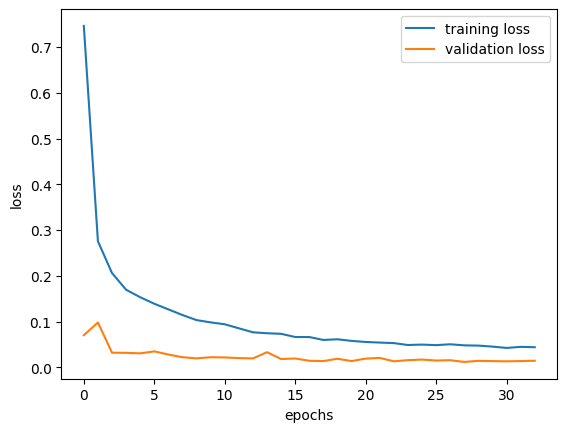

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

1/1 [==============================] - 0s 13ms/step


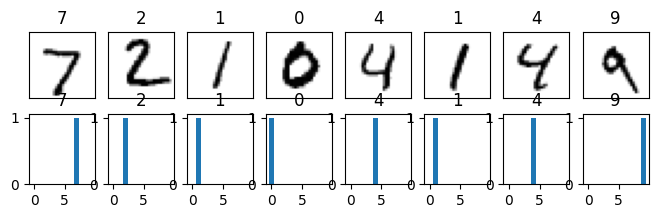

In [15]:
plt.figure(figsize=(8, 2))
for i in range(0,8):
 ax=plt.subplot(2,8,i+1)
 plt.imshow(x_test[i,:].reshape(28,28), cmap=plt.get_cmap('gray_r'))
 plt.title(labels_test[i])
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
for i in range(0,8):
 output = net.predict(x_test[i,:].reshape(1, 28,28,1))   
 output=output[0,0:]
 plt.subplot(2,8,8+i+1)
 plt.bar(np.arange(10.),output)
 plt.title(np.argmax(output))

In [16]:
net.save("H5/model2.h5")